Import needed library and file

In [158]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd

In [159]:
pathfile ='California_House_Price.csv'
df = pd.read_csv(pathfile)

Read the data

In [160]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [161]:
df.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20630,-121.32,39.29,11,2640,505.0,1257,445,3.5673,INLAND,112000
20631,-121.40,39.33,15,2655,493.0,1200,432,3.5179,INLAND,107200
20632,-121.45,39.26,15,2319,416.0,1047,385,3.1250,INLAND,115600
20633,-121.53,39.19,27,2080,412.0,1082,382,2.5495,INLAND,98300
20634,-121.56,39.27,28,2332,395.0,1041,344,3.7125,INLAND,116800
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [162]:
df.shape

(20640, 10)

In [163]:
df.size

206400

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [165]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Handle missing value

In [166]:
#Show rows have missing value
rows_with_nan = df[df.isnull().any(axis=1)]
print(rows_with_nan)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                  47         1256             NaN   
341      -122.17     37.75                  38          992             NaN   
538      -122.28     37.78                  29         5154             NaN   
563      -122.24     37.75                  45          891             NaN   
696      -122.10     37.69                  41          746             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                  18         3620             NaN   
20268    -119.18     34.19                  19         2393             NaN   
20372    -118.88     34.17                  15         4260             NaN   
20460    -118.75     34.29                  17         5512             NaN   
20484    -118.72     34.28                  17         3051             NaN   

       population  households  median_income ocean_

In [167]:
#Change missing value to median of the column
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [168]:
#Check again the missing value
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

Check for duplicate

In [169]:
# Check for duplicate
duplicate_rows = df[df.duplicated(['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity','median_house_value'])]
duplicate_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


Focus on the object column - ocean_promixity

In [170]:
ocean_proximity_unique = df['ocean_proximity'].unique()
ocean_proximity_unique

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [171]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

['ocean_proximity']

In [172]:
df[cat].value_counts()

ocean_proximity
<1H OCEAN          9136
INLAND             6551
NEAR OCEAN         2658
NEAR BAY           2290
ISLAND                5
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_28416\679042813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.sort_values('median_house_value',ascending=False), x='ocean_proximity',palette=custom_palette)
C:\Users\hp\AppData\Local\Temp\ipykernel_28416\679042813.py:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.countplot(data=df.sort_values('median_house_value',ascending=False), x='ocean_proximity',palette=custom_palette)


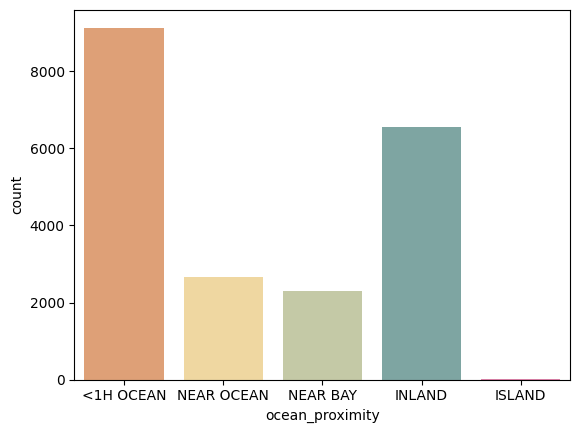

In [173]:
custom_palette = sns.color_palette(['#EF9C66', '#FCDC94', '#C8CFA0','#78ABA8','#F075AA','#6482AD','#B692C2'])
sns.countplot(data=df.sort_values('median_house_value',ascending=False), x='ocean_proximity',palette=custom_palette)
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_28416\1066106813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='ocean_proximity',y='median_house_value',data=df.sort_values('median_house_value',ascending=False),kind='boxen',aspect=3, palette=custom_palette)
C:\Users\hp\AppData\Local\Temp\ipykernel_28416\1066106813.py:2: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.catplot(x='ocean_proximity',y='median_house_value',data=df.sort_values('median_house_value',ascending=False),kind='boxen',aspect=3, palette=custom_palette)


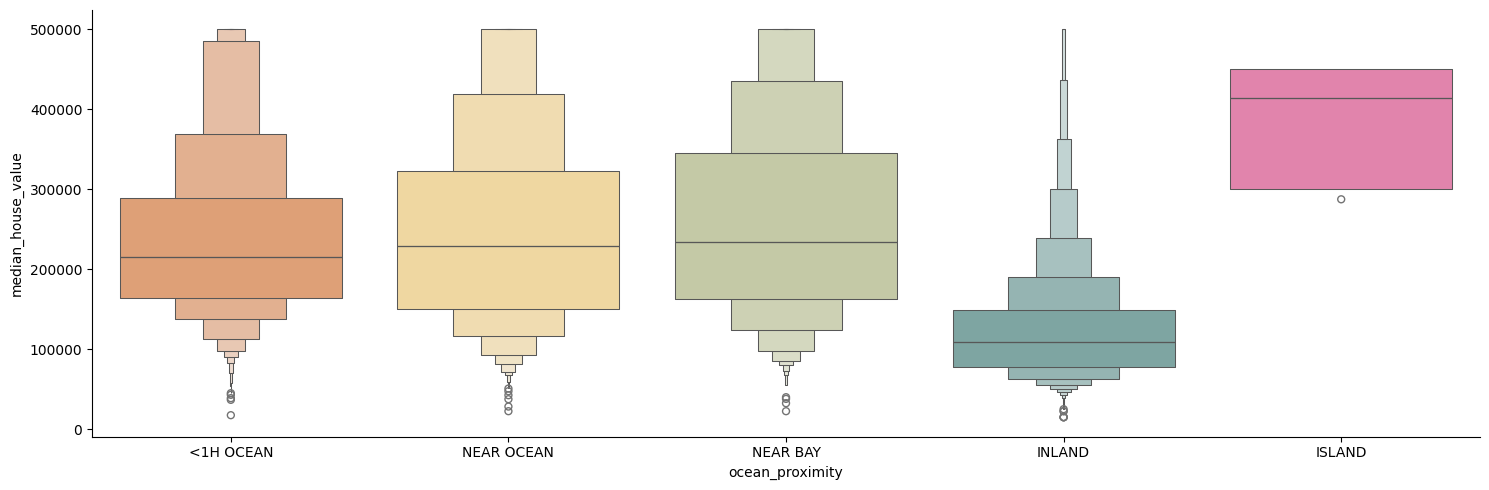

In [174]:
#Generate a boxplot for ocean_proximity
sns.catplot(x='ocean_proximity',y='median_house_value',data=df.sort_values('median_house_value',ascending=False),kind='boxen',aspect=3, palette=custom_palette)

In [175]:
#Map the categorical data
df['ocean_proximity_number'] = df['ocean_proximity'].map({
    'NEAR BAY': 0, '<1H OCEAN': 1, 'INLAND': 2,  'NEAR OCEAN': 3, 'ISLAND': 4
})
df['ocean_proximity_number'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

Outliers

<Axes: >

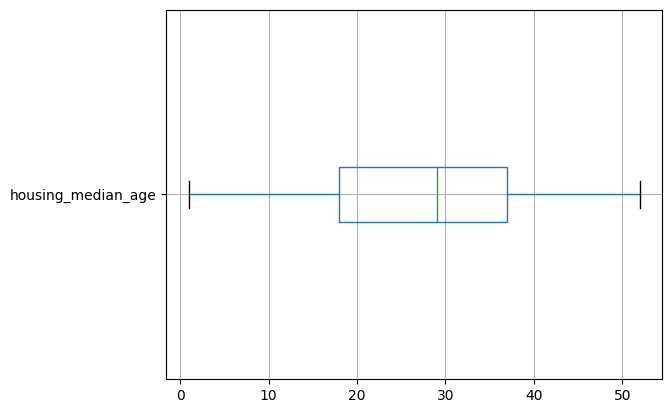

In [176]:
df[["housing_median_age"]].boxplot(vert=False)

<Axes: >

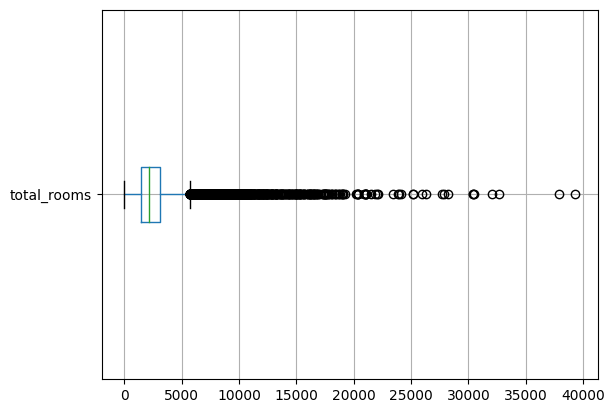

In [177]:
df[["total_rooms"]].boxplot(vert=False,)

<Axes: >

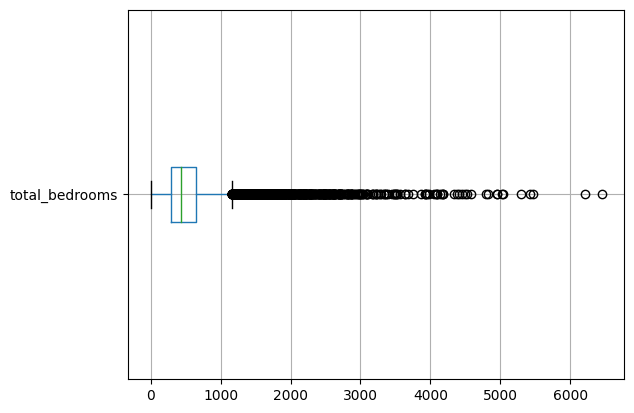

In [178]:
df[["total_bedrooms"]].boxplot(vert=False)

<Axes: >

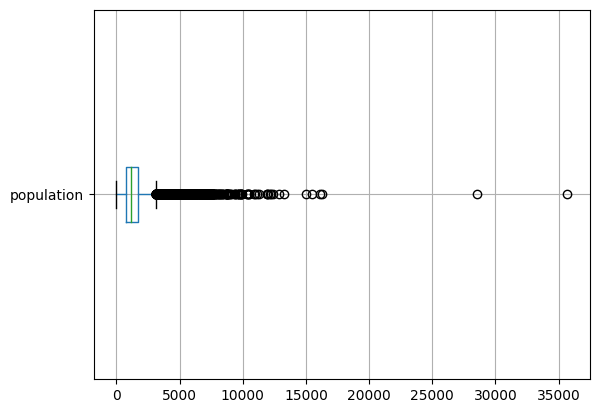

In [179]:
df[["population"]].boxplot(vert=False)

<Axes: >

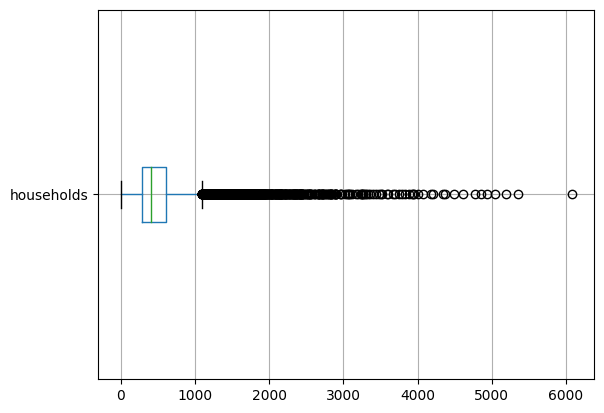

In [180]:
df[["households"]].boxplot(vert=False)

<Axes: >

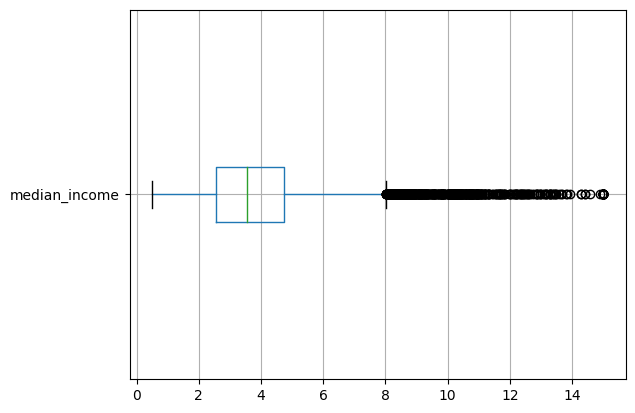

In [181]:
df[["median_income"]].boxplot(vert=False)

<Axes: >

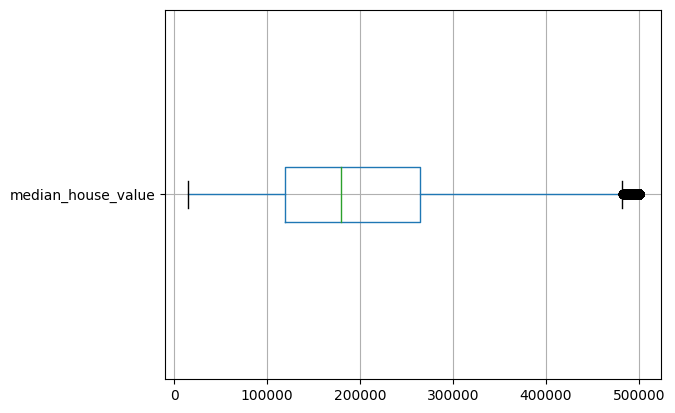

In [182]:
df[["median_house_value"]].boxplot(vert=False)

Summarize

In [183]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_number
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909,1.464729
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874,0.854226
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,1.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,2.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


Separate the train & test data

In [184]:
input_data = df.drop(['median_house_value','ocean_proximity','longitude','latitude'],axis=1)
target_data = df['median_house_value']

In [185]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data, test_size=0.2, random_state=42)

Graphically data analysis

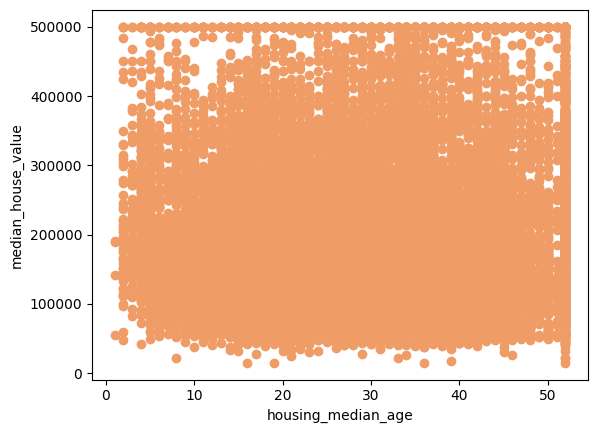

In [186]:
plt.scatter(df.housing_median_age, target_data, color=custom_palette[0])
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.show()

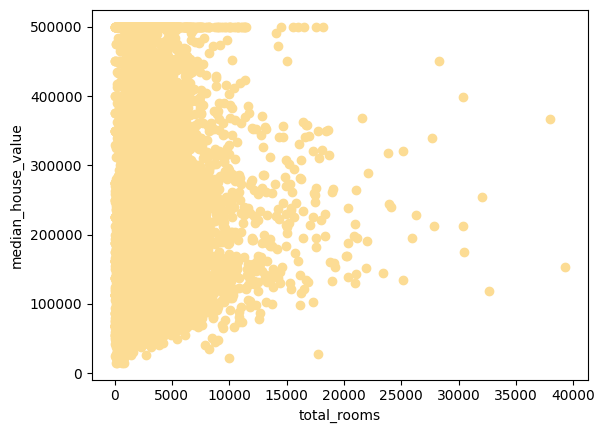

In [187]:
plt.scatter(df.total_rooms, target_data, color=custom_palette[1])
plt.xlabel("total_rooms")
plt.ylabel("median_house_value")
plt.show()

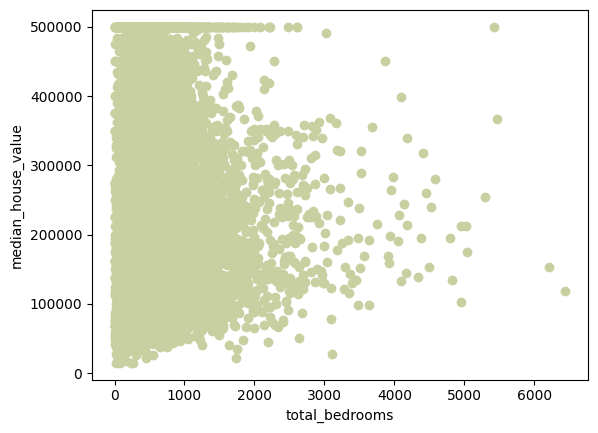

In [188]:
plt.scatter(df.total_bedrooms, target_data, color=custom_palette[2])
plt.xlabel("total_bedrooms")
plt.ylabel("median_house_value")
plt.show()

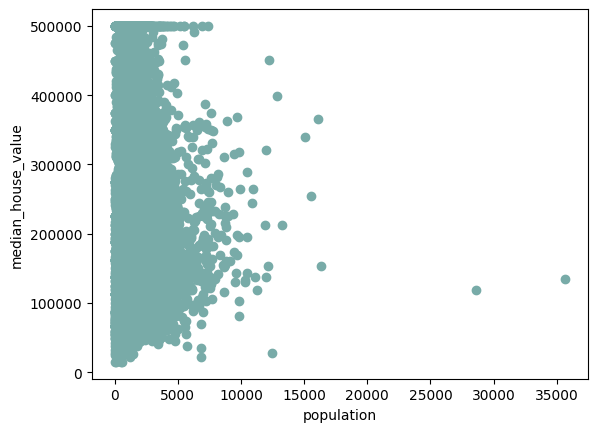

In [189]:
plt.scatter(df.population, target_data, color=custom_palette[3])
plt.xlabel("population")
plt.ylabel("median_house_value")
plt.show()

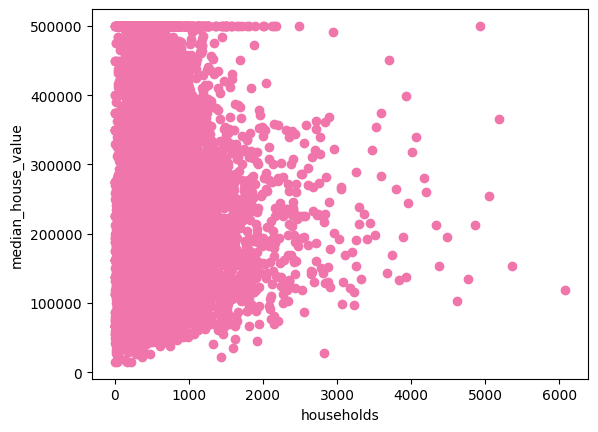

In [190]:
plt.scatter(df.households, target_data, color=custom_palette[4])
plt.xlabel("households")
plt.ylabel("median_house_value")
plt.show()

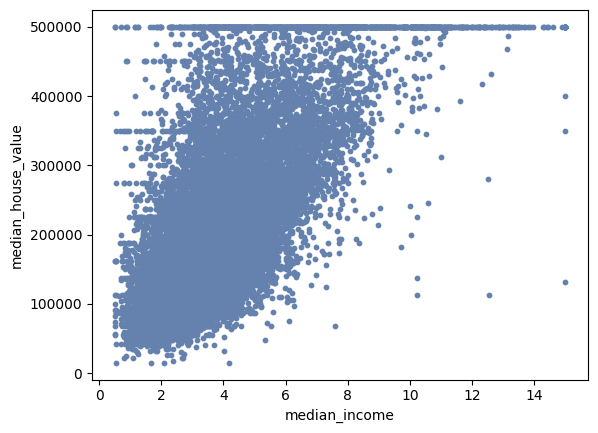

In [191]:
plt.scatter(df.median_income, target_data, color=custom_palette[5], s=10)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

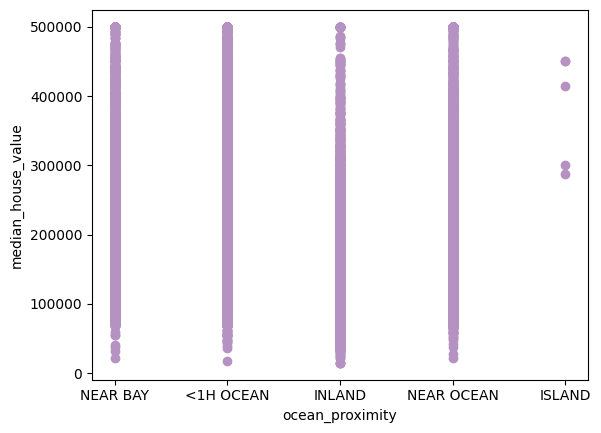

In [192]:
plt.scatter(df.ocean_proximity, target_data, color=custom_palette[6])
plt.xlabel("ocean_proximity")
plt.ylabel("median_house_value")
plt.show()

array([[<Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>],
       [<Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'ocean_proximity_number'}>, <Axes: >,
        <Axes: >]], dtype=object)

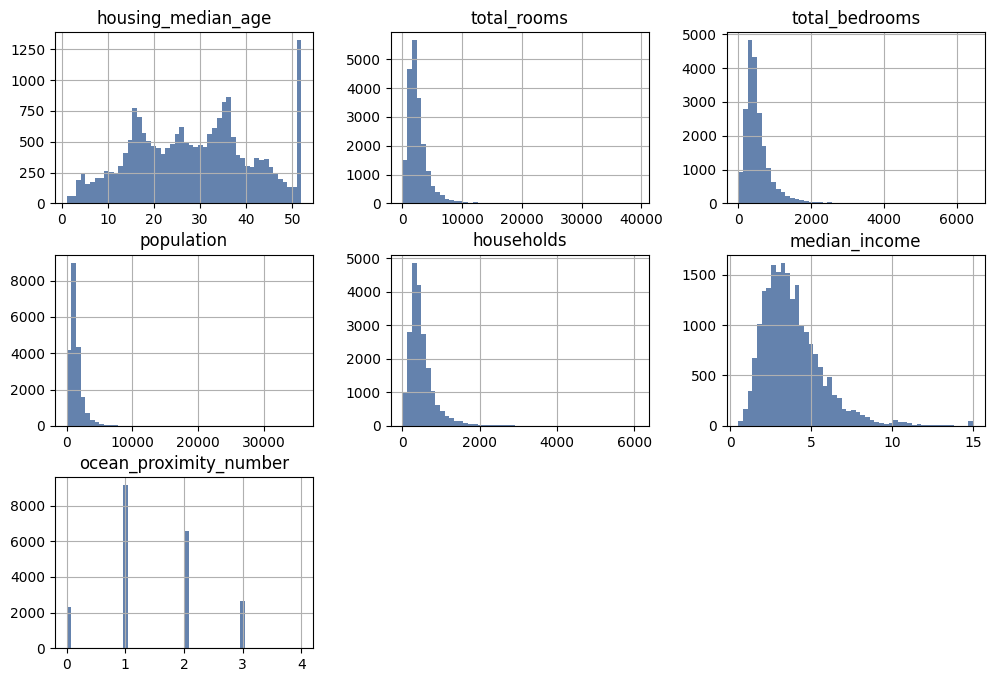

In [193]:
#Histogram of input_data
input_data.hist(figsize=(12,8), bins=50, color=custom_palette[5])

Correlation

In [194]:
input_data.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_number
housing_median_age,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,-0.204882
total_rooms,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.014818
total_bedrooms,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.004076
population,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.008511
households,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,-0.016911
median_income,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,-0.129135
ocean_proximity_number,-0.204882,0.014818,0.004076,-0.008511,-0.016911,-0.129135,1.000000


<Axes: >

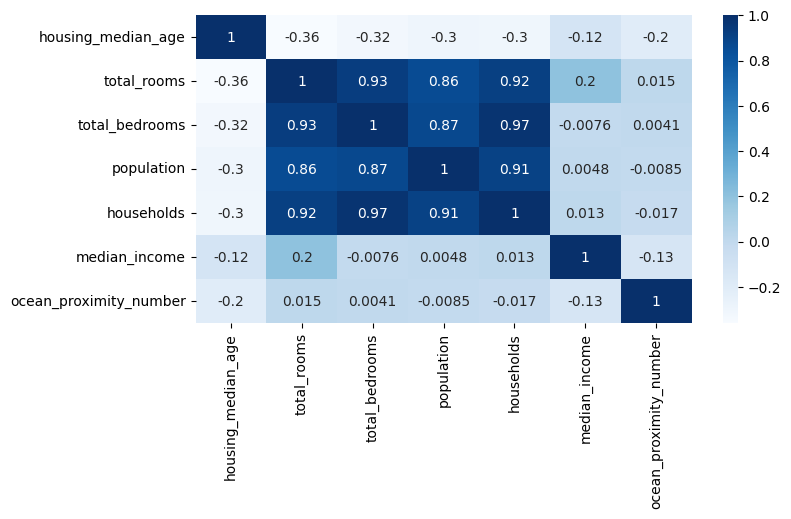

In [195]:
plt.figure(figsize=(8,4))
custom_cmap=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(input_data.corr(), annot=True, cmap=custom_cmap)

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [197]:
#Calculate VIF for each explanatory variable
X=add_constant(input_data)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#View VIF for each explanatory variable, >2 = multicollinearity, >10 = severe multicollinearity
vif

,Variable,VIF
0,const,26.307604
1,housing_median_age,1.218761
2,total_rooms,11.451208
3,total_bedrooms,26.572804
4,population,6.124893
5,households,27.314665
6,median_income,1.521362
7,ocean_proximity_number,1.094793


Modeling OLS

In [198]:
X = input_data
y = target_data

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3896.
Date:                Sun, 18 Aug 2024   Prob (F-statistic):               0.00
Time:                        16:31:50   Log-Likelihood:            -2.6118e+05
No. Observations:               20640   AIC:                         5.224e+05
Df Residuals:                   20632   BIC:                         5.224e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -2.32

In [199]:
print('Name of the model: OLS model and result for test')
print('R-square of the model:',model.rsquared)
print('RMSE of the model:',math.sqrt(model.mse_total))
print('MAE of the model:',abs(y - model.predict(X)).mean())

Name of the model: OLS model and result for test
R-square of the model: 0.5693093200490871
RMSE of the model: 115395.61587441387
MAE of the model: 55699.490436510336


In [200]:
#Predict with OLS
##Insert the example input (intercept, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity_number)
X_test_predict = np.array([1, 15, 2655, 493, 1200, 432, 3.5179, 2])
##Predict
model.get_prediction(X_test_predict).summary_frame(alpha=0.05) #alpha=0.05 is the significance level for confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,157206.829624,887.326404,155467.599798,158946.05945,8733.285482,305680.373766


In [201]:
#Predicting2
X_test_predict = np.array([1, 16, 2655, 493, 1200, 432, 3.5179, 2])
model.get_prediction(X_test_predict).summary_frame(alpha=0.05) #alpha=0.05 is the significance level for confidence interval

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,158938.794226,859.074476,157254.940411,160622.64804,10465.888437,307411.700015


White test > heteroskedasticity

In [202]:
white_test = smd.het_white(model.resid, model.model.exog)

In [203]:
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))
#If the p-values are below a certain threshold (commonly 0.05), it indicates the presence of heteroscedasticity.

{'Test Statistic': 3673.3660441256793, 'Test Statistic p-value': 0.0, 'F-Statistic': 127.45357264988385, 'F-Test p-value': 0.0}


Wooldridge test > autocorrelation

In [204]:
test_result = smd.acorr_breusch_godfrey(model, nlags=1)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-statistic', 'f-test p-value']
results = dict(zip(labels, test_result))

print(results)
#If the p-values are below a certain threshold (commonly 0.05), it indicates the presence of autocorrelation.

{'Lagrange multiplier statistic': 6044.0624320659945, 'p-value': 0.0, 'f-statistic': 8543.134105334739, 'f-test p-value': 0.0}


Modeling RandomForestRegressor

In [205]:
rfr = RandomForestRegressor()

rfr.fit(x_train, y_train)

RandomForestRegressor()

In [206]:
def met(name,key,arg):
    print('Name of the model: ',name)
    print('R-square of the model:',r2_score(key,arg))
    print('RMSE of the model:',np.sqrt(mean_squared_error(key,arg)))
    print('MAE of the model:',mean_absolute_error(key,arg))

In [207]:
y_pred_rfr = rfr.predict(x_test)

met('RandomForestRegressor model and result for test', y_test, y_pred_rfr)

Name of the model:  RandomForestRegressor model and result for test
R-square of the model: 0.6928525605703264
RMSE of the model: 63442.002039055114
MAE of the model: 43914.80373062016


In [208]:
#Predict with Random Forest Regressor
X_test_predict_rfr = np.array([15, 2655, 493, 1200, 432, 3.5179, 2])
predictionsRTR = rfr.predict([X_test_predict_rfr])
print(int(predictionsRTR))

107918


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
